# DATA PREPROCESSING

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data['Class'].value_counts()
xx=data.drop('Class',inplace=False,axis=1)
yy=data['Class']
xx.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

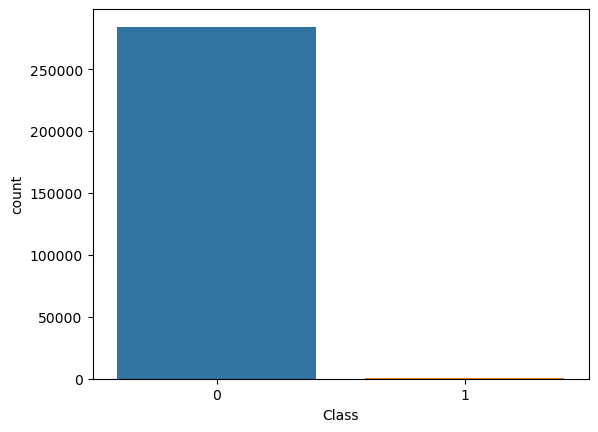

In [7]:
import seaborn as sns
sns.countplot(data['Class'])

# Oversampling

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Assuming xx and yy are your feature matrix and target vector respectively
ros = RandomOverSampler(random_state=42)
x_resample, y_resample = ros.fit_resample(xx, yy)


In [120]:
y_resample.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
nd=StandardScaler()
x_scaled=nd.fit_transform(x_resample)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_resample,test_size=0.1,random_state=42)

In [125]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


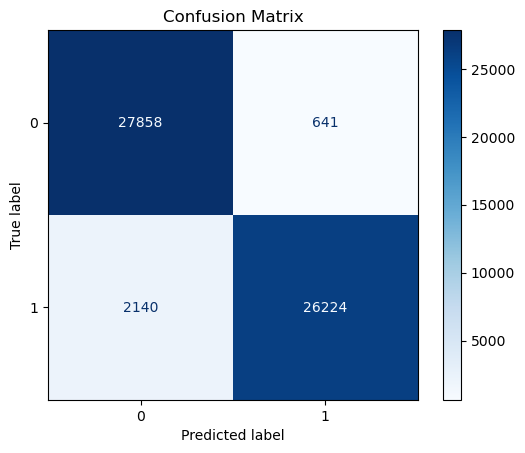

In [126]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues')
mlt.title('Confusion Matrix')
mlt.show()

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28499
           1       0.98      0.92      0.95     28364

    accuracy                           0.95     56863
   macro avg       0.95      0.95      0.95     56863
weighted avg       0.95      0.95      0.95     56863



In [ ]:
y_pred=rd.predict(x_test)

In [15]:
from sklearn.svm import SVMC
rd=SVMC()
rd.fit(x_train,y_train)



ImportError: cannot import name 'SVMC' from 'sklearn.svm' (C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\__init__.py)

# Undersampling

In [5]:
class_0=data[data['Class']==0]
class_0=class_0.sample(n=492)

In [6]:
class_1=data[data['Class']==1]


In [7]:
class_0.shape,class_1.shape

((492, 31), (492, 31))

In [8]:
new_data=pd.concat([class_0,class_1],ignore_index=True)

In [9]:
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,33312.0,1.080388,0.173962,1.485508,2.464664,-0.752562,0.267360,-0.648039,0.148922,-0.136994,...,0.236833,0.629524,-0.107804,0.054347,0.303077,0.126817,0.042362,0.045949,41.11,0
1,75652.0,-0.937620,0.534814,2.023451,-0.945976,0.165325,-0.339358,0.610265,-0.231131,-0.351780,...,-0.087904,-0.173913,-0.231566,0.059211,0.021642,0.890764,-0.436131,-0.171584,22.70,0
2,64052.0,-1.018335,-0.378448,2.378975,2.005886,-0.050274,-0.362833,-0.536106,0.236972,0.013973,...,0.337387,0.769229,0.117551,0.405620,-0.176185,-0.036618,0.151793,0.171740,74.45,0
3,41888.0,1.251548,-0.231868,0.114310,-0.900655,-0.600716,-0.891695,-0.153223,-0.085120,1.353779,...,0.200270,0.734565,-0.168067,0.102705,0.736040,-0.473635,0.063262,0.015894,6.65,0
4,78724.0,-0.273392,1.057058,0.715029,-0.255843,0.771271,-0.214771,0.649606,0.014750,-0.311652,...,-0.351612,-0.940460,-0.184373,-1.064960,0.031379,0.158380,0.243473,0.085180,1.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

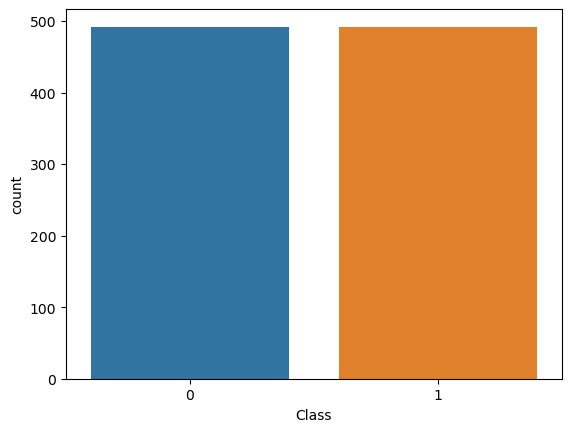

In [11]:
import seaborn as sns
sns.countplot(new_data['Class'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21a1ac3ebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a1ac4f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a1ac3e8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21a1ac4f730>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a1ac4fa00>],
 'means': []}

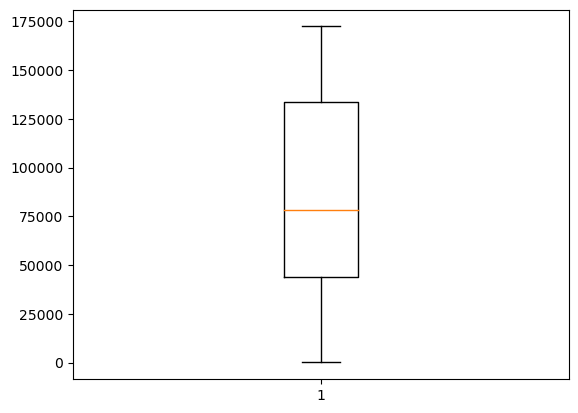

In [12]:
mlt.boxplot(new_data['Time'])

In [14]:
new_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V2

In [20]:
x=new_data.drop('Class',inplace=False,axis=1)
y=new_data['Class']

In [77]:
from sklearn.preprocessing import StandardScaler
nd=StandardScaler()
x_scaled=nd.fit_transform(x)


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.1,random_state=42)

In [79]:
y_train.value_counts()

1    444
0    441
Name: Class, dtype: int64

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

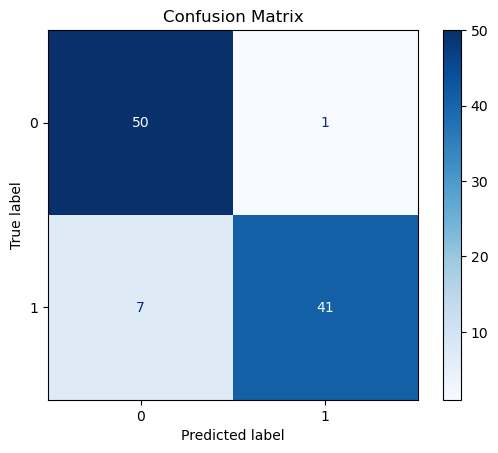

In [81]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues')
mlt.title('Confusion Matrix')
mlt.show()

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        51
           1       0.98      0.85      0.91        48

    accuracy                           0.92        99
   macro avg       0.93      0.92      0.92        99
weighted avg       0.93      0.92      0.92        99



# Random Forest classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=150)
rd.fit(x_train,y_train)
y_pred=rd.predict(x_test)

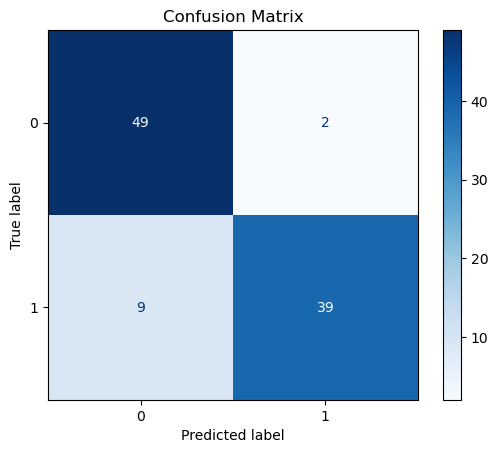

In [90]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues')
mlt.title('Confusion Matrix')
mlt.show()

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        51
           1       0.95      0.81      0.88        48

    accuracy                           0.89        99
   macro avg       0.90      0.89      0.89        99
weighted avg       0.90      0.89      0.89        99

